In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('final_data_new.csv')
X = df.drop(columns=['severity_class_1.0', 'severity_class_2.0', 'severity_class_3.0', 
                       'severity_class_4.0', 'severity_class_5.0', 'severity_class_6.0',
                       'severity_class_7.0', 'severity_class_8.0', 'severity_class_9.0','ev_id'])

y = df[['severity_class_1.0', 'severity_class_2.0', 'severity_class_3.0', 
          'severity_class_4.0', 'severity_class_5.0', 'severity_class_6.0',
          'severity_class_7.0', 'severity_class_8.0', 'severity_class_9.0']]

C:\Users\Tanushree\AppData\Local\Temp\ipykernel_13072\3603064375.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_data_new.csv')


In [4]:
y = df.iloc[:, 1:10]
X = df.iloc[:, 10:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=5) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [7]:
y_pred = y_test.copy()
y_pred_df.loc[:,:] = y_pred

In [8]:
y_test.sum()

severity_class_1.0     155
severity_class_2.0      35
severity_class_3.0      23
severity_class_4.0    2835
severity_class_5.0     957
severity_class_6.0     463
severity_class_7.0     382
severity_class_8.0     120
severity_class_9.0      56
dtype: int64

In [9]:
y_pred = clf.predict(X_test)

In [10]:
y_pred_df.sum()

severity_class_1.0     155
severity_class_2.0      35
severity_class_3.0      23
severity_class_4.0    2835
severity_class_5.0     957
severity_class_6.0     463
severity_class_7.0     382
severity_class_8.0     120
severity_class_9.0      56
dtype: int64

In [11]:
weights = {
    1: 1/(y.sum()[0]/len(y)),
    2: 1/(y.sum()[1]/len(y)),
    3: 1/(y.sum()[2]/len(y)),
    4: 1/(y.sum()[3]/len(y)),
    5: 1/(y.sum()[4]/len(y)),
    6: 1/(y.sum()[5]/len(y)),
    7: 1/(y.sum()[6]/len(y)),
    8: 1/(y.sum()[7]/len(y)),
    9: 1/(y.sum()[8]/len(y)),
    }

C:\Users\Tanushree\AppData\Local\Temp\ipykernel_13072\2998778069.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1: 1/(y.sum()[0]/len(y)),
C:\Users\Tanushree\AppData\Local\Temp\ipykernel_13072\2998778069.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  2: 1/(y.sum()[1]/len(y)),
C:\Users\Tanushree\AppData\Local\Temp\ipykernel_13072\2998778069.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  3: 1/(y.sum()[2]/len(y)),
C:\User

In [12]:
weights

{1: 30.64146341463415,
 2: 125.0049751243781,
 3: 220.4035087719298,
 4: 1.7438922820655192,
 5: 5.665388951521984,
 6: 10.710144927536232,
 7: 13.336518046709129,
 8: 43.171821305841924,
 9: 74.77976190476191}

In [13]:
y_single_column = y.idxmax(axis=1).str.extract('(\d+)').astype(int)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_single_column, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=5, class_weight=weights) 
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight={1: 30.64146341463415, 2: 125.0049751243781,
                                     3: 220.4035087719298,
                                     4: 1.7438922820655192,
                                     5: 5.665388951521984,
                                     6: 10.710144927536232,
                                     7: 13.336518046709129,
                                     8: 43.171821305841924,
                                     9: 74.77976190476191},
                       max_depth=4, min_samples_split=5)

In [16]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balance = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')        
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balance:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.33
Balanced Accuracy: 0.23
Precision: 0.51
Recall: 0.33
F1 Score: 0.37


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


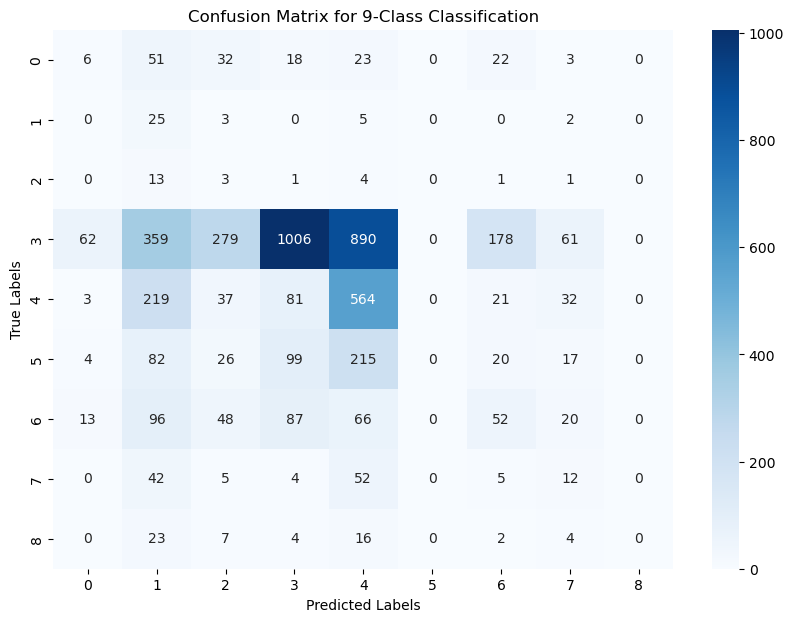

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix for 9-Class Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()